Tools
In this we will make use of:

NumPy, a popular library for scientific computing
Matplotlib, a popular library for plotting data
local plotting routines in the lab_utils_uni.py file in the local directory

In [1]:
import numpy as np



Problem Statement
You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

Size (1000 sqft)	Price (1000s of dollars)
1	300
2	500


In [3]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
𝐽(𝑤,𝑏)=1/2𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2(1)

where
𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏(2)

𝑓𝑤,𝑏(𝑥(𝑖))
 is our prediction for example 𝑖
 using parameters 𝑤,𝑏
.
(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2
 is the squared difference between the target value and the prediction.
These differences are summed over all the 𝑚
 examples and divided by 2m to produce the cost, 𝐽(𝑤,𝑏)
.
Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

The code below calculates cost by looping over each example. In each loop:

f_wb, a prediction is calculated
the difference between the target and the prediction is calculated and squared.
this is added to the total cost.

In [4]:
def compute_cost(x,y,w,b):
    m = len(x)
    # print(m)
    sum =0
    for i in range(m):
        f_wb = w*x[i]+b
        # print(f_wb)
        sum = sum + (f_wb - y[i])**2
    # print(sum_total)
    # the below a=can also be written as  
    # totalCost = (1/(2*m))*np.sum((w*x+b-y))**2
    totalCost = sum/(2*m)
    return totalCost

    

In the above function we have calculated the cost , we would be providing the values for x,y,w,b
Now in th below we would be running that , for this instance we will take w = 0.5 and b =0 

In [5]:
w = 0.5
b = 0
cost = compute_cost(x_train,y_train,w,b)
print(cost)



84675.3125


Gradient descent summary
So far in this course, you have developed a linear model that predicts  𝑓𝑤,𝑏(𝑥(𝑖))
 :
𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏(1)
In linear regression, you utilize input training data to fit the parameters  𝑤
 , 𝑏
  by minimizing a measure of the error between our predictions  𝑓𝑤,𝑏(𝑥(𝑖))
  and the actual data  𝑦(𝑖)
 . The measure is called the  𝑐𝑜𝑠𝑡
 ,  𝐽(𝑤,𝑏)
 . In training you measure the cost over all of our training samples  𝑥(𝑖),𝑦(𝑖)
 
𝐽(𝑤,𝑏)=12𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2(2)

In lecture, gradient descent was described as:

repeat𝑤𝑏} until convergence:{=𝑤−𝛼∂𝐽(𝑤,𝑏)∂𝑤=𝑏−𝛼∂𝐽(𝑤,𝑏)∂𝑏(3)
where, parameters 𝑤
, 𝑏
 are updated simultaneously.
The gradient is defined as:
∂𝐽(𝑤,𝑏)∂𝑤∂𝐽(𝑤,𝑏)∂𝑏=1𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)=1𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))(4)(5)

Here simultaniously means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.

compute_gradient implementing equation (4) and (5) above
compute_cost implementing equation (2) above (code from previous lab)
gradient_descent, utilizing compute_gradient and compute_cost
Conventions:

The naming of python variables containing partial derivatives follows this pattern,∂𝐽(𝑤,𝑏)∂𝑏
 will be dj_db.
w.r.t is With Respect To, as in partial derivative of 𝐽(𝑤𝑏)
 With Respect To 𝑏
.

In [6]:
def gradient_compute(x,y,w,b):
    m = x.shape[0]
    dj_dw =0 
    dj_db =0
    for i in range(m):
        f_wb= w*x[i]+b
        dj_dw = dj_dw +  (f_wb-y[i])*x[i]
        dj_db = dj_db + (f_wb-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw , dj_db


Noow once we have our gradients (i.e the value of dj/dw and dj/db) we can go ahead a=can formulate the actuual gradient descent algorithm.


In [7]:
def gradient_descent (x,y ,w_in,b_in,alpha , num_iteration):
    w = w_in
    b = b_in
    final_cost = np.inf
    for i in range(num_iteration):
        dj_dw , dj_db = gradient_compute(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x,y,w,b)
        if(cost>final_cost):
            print(f"cost is increasing decrease the learning rate")
            break
        final_cost = cost
        print(f"cost for iteration {i} and value for w {w} and b {b} is {cost} also the gradients are {dj_dw} and {dj_db}")
    return w,b



the use of itrator in the above coe is to move toward the minimum value of w and b 

below we are initiliazling the gradient descent function

In [8]:
w= 0 
b =0 
import numpy as np

# Generate 100 random house areas between 0.5k and 6.0k sqft
np.random.seed(42)
x_train = np.round(np.random.uniform(0.5, 6.0, 100), 2)

# Generate prices using a linear formula with some noise
noise = np.random.normal(0, 20, size=x_train.shape)  # ±20k noise
y_train = 200 * x_train + 100 + noise

# Round prices for readability
y_train = np.round(y_train, 2)

# Display results
print("x_train =", x_train)
print("y_train =", y_train)

alpha = 0.032
iterator = 1000000
w_final,b_final = gradient_descent(x_train,y_train ,w,b,alpha , iterator)


x_train = [2.56 5.73 4.53 3.79 1.36 1.36 0.82 5.26 3.81 4.39 0.61 5.83 5.08 1.67
 1.5  1.51 2.17 3.39 2.88 2.1  3.87 1.27 2.11 2.51 3.01 4.82 1.6  3.33
 3.76 0.76 3.84 1.44 0.86 5.72 5.81 4.95 2.18 1.04 4.26 2.92 1.17 3.22
 0.69 5.5  1.92 4.14 2.21 3.36 3.51 1.52 5.83 4.76 5.67 5.42 3.79 5.57
 0.99 1.58 0.75 2.29 2.64 1.99 5.06 2.46 2.05 3.48 1.28 4.91 0.91 5.93
 4.75 1.59 0.53 4.99 4.39 4.51 4.74 0.91 2.47 1.14 5.25 3.93 2.32 0.85
 2.21 2.29 4.51 4.01 5.38 3.1  1.16 4.42 4.68 3.59 4.74 3.22 3.38 2.85
 0.64 1.09]
y_train = [ 613.74 1240.02 1007.84  818.25  367.61  379.14  293.56 1141.63  845.83
  967.96  240.31 1272.58 1105.4   444.27  401.94  421.37  519.96  771.45
  668.16  490.73  879.92  359.22  522.1   597.31  673.69 1055.59  413.15
  749.95  848.77  260.08  905.72  391.49  277.15 1242.51 1223.62 1089.47
  537.2   357.26  948.15  690.03  333.31  720.63  260.86 1215.04  499.82
  909.81  570.06  743.96  813.74  447.81 1246.19 1040.67 1235.99 1173.93
  826.99 1215.37  276.75  425.47 

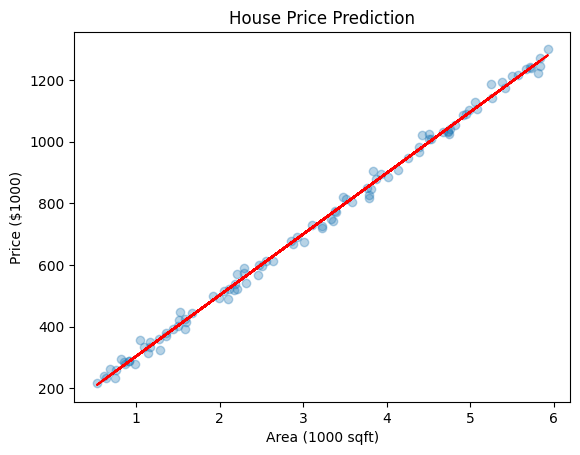

In [10]:
import matplotlib.pyplot as plt

y_pred = w_final * x_train + b_final

plt.scatter(x_train, y_train, label="Actual data", alpha=0.32)
plt.plot(x_train, y_pred, color="red", label="Model prediction")
plt.xlabel("Area (1000 sqft)")
plt.ylabel("Price ($1000)")
plt.title("House Price Prediction")
# plt.legend()
# plt.grid(True)
plt.show()
